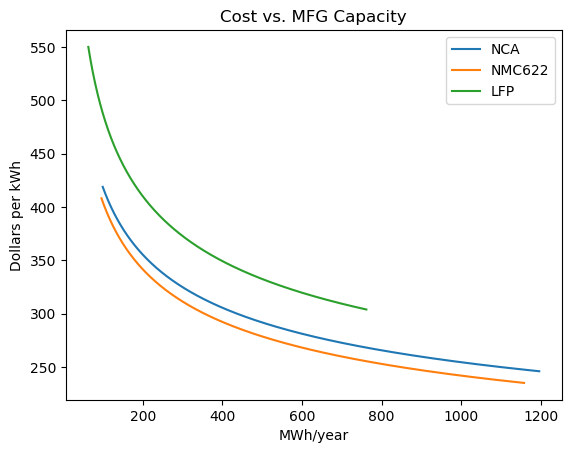

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [5]:
include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)




using PyPlot

    ###################################################### USD/kWh vs MWH/year  #####################################################################
cell_general.cathode.por = 0.3
cost.cell_costs.anode.AM[1] = 10.57
cost.cell_costs.cathode.AM[1] = 17.0
cell_general.cathode.th       = converter(150.0, mult.pos_th)
cost_calc(cell_general, cost, system="Cell", cost_verbosity = 0)


clf()
data = ["NCA", "NMC622", "LFP"]
AM_rho_data = [4.71, 4.8, 3.6]
rev_sp_cap_data  = [0.180, 0.171, 0.150]
AM_price_data = [26.43, 17.83, 5.07]

for j in range(1, 3, step=1)
    cell_general.cathode.AM_rho = AM_rho_data[j]
    cell_general.cathode.rev_sp_cap = rev_sp_cap_data[j]
    cost.cell_costs.cathode.AM[1] =  AM_price_data[j]
    param_x = []
    param_y = []

    for i in range(10, 120, length=1000)
        # cost.material.pos_AM[1] = i
        cost.general_costs.no_units_mfg = converter(i, mult.units_mfg)
        dollars_per_kWh, mfg_capacity = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)
        append!(param_y, dollars_per_kWh)
        append!(param_x, mfg_capacity)
    end
    plot(param_x, param_y)
end


xlabel(String("MWh/year"))
ylabel("Dollars per kWh")
title("Cost vs. MFG Capacity")
legend(data)
figure(2)

The plot above shows the economies of scale for NCA, NMC622 and LFP with the cost data present in the script above. As we manufacture more cells, the unit material costs decrease as a result of more annual demand.